<a href="https://colab.research.google.com/github/FRNEYRA10/FRNEYRA10/blob/main/Met_M%C3%ADnimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea con el Método de Mínimos cuadrados


================== TABLA COMPARATIVA ==================

  x  u_exact  u_coloc     u_LS  Error_coloc  Error_LS
0.0 0.000000 0.000000 0.000000     0.000000  0.000000
0.1 0.199833 0.199294 0.199704     0.000539  0.000130
0.2 0.398669 0.396706 0.398244     0.001963  0.000426
0.3 0.595520 0.591529 0.594764     0.003991  0.000756
0.4 0.789418 0.783059 0.788410     0.006360  0.001008
0.5 0.979426 0.970588 0.978325     0.008837  0.001101
0.6 1.164642 1.153412 1.163652     0.011231  0.000990
0.7 1.344218 1.330824 1.343538     0.013394  0.000680
0.8 1.517356 1.502118 1.517124     0.015238  0.000232
0.9 1.683327 1.666588 1.683557     0.016739  0.000230
1.0 1.841471 1.823529 1.841979     0.017942  0.000508


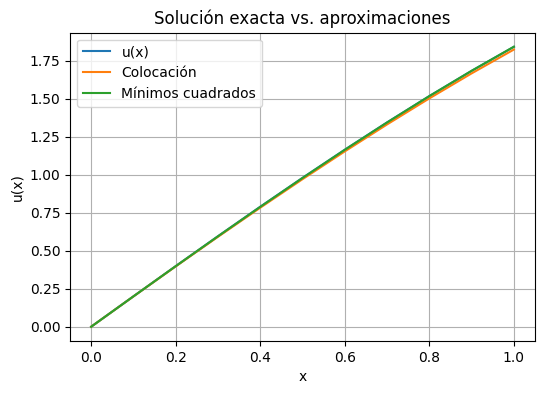

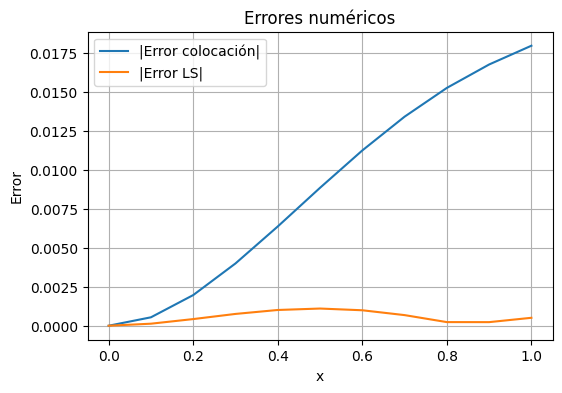


============= RESULTADOS FINALES =============

Aproximación por colocación:
u_col(x) = x*(-2*x**2 - x + 34)/17

Aproximación por mínimos cuadrados:
u_LS(x) = x*(-24759*x**2 - 2670*x + 347156)/173578

Coeficientes colocación: a2 = -1/17 , a3 = -2/17
Coeficientes mínimos cuadrados: a2 = -1335/86789 , a3 = -24759/173578


In [3]:
# ============================================================
#   MÉTODO DE COLOCACIÓN Y MÉTODO DE MÍNIMOS CUADRADOS
#   Ecuación diferencial: u'' + u = x
#   CI: u(0)=0,  u'(0)=2
#   Aproximación cúbica: uN(x) = 2x + a2 x^2 + a3 x^3

import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# ============================
# 1. DEFINICIONES BÁSICAS
# ============================

x = sp.symbols('x')

# Solución exacta
u_exact = x + sp.sin(x)

# Aproximación general
a2, a3 = sp.symbols('a2 a3')
uN = 2*x + a2*x**2 + a3*x**3

# Residuo
R = sp.diff(uN, x, 2) + uN - x


# ============================
# 2. MÉTODO DE COLOCACIÓN
# ============================

# Puntos de colocación
eq1 = R.subs(x, 1/sp.Integer(2))
eq2 = R.subs(x, 1)

sol_col = sp.solve([eq1, eq2], [a2, a3])
a2_col = sol_col[a2]
a3_col = sol_col[a3]

# Aproximación por colocación
u_col = sp.simplify(uN.subs({a2: a2_col, a3: a3_col}))


# ============================
# 3. MÉTODO DE MÍNIMOS CUADRADOS
# ============================

# Funcional a minimizar: ∫0^1 R(x)^2 dx
J = sp.integrate(R**2, (x, 0, 1))

# Derivadas parciales = 0
eqLS1 = sp.diff(J, a2)
eqLS2 = sp.diff(J, a3)

sol_ls = sp.solve([eqLS1, eqLS2], [a2, a3])
a2_ls = sol_ls[a2]
a3_ls = sol_ls[a3]

# Aproximación por mínimos cuadrados
u_ls = sp.simplify(uN.subs({a2: a2_ls, a3: a3_ls}))


# ============================
# 4. ERRORES SIMBÓLICOS
# ============================

E_col = sp.simplify(u_exact - u_col)
E_ls  = sp.simplify(u_exact - u_ls)

# Lambdify para evaluación numérica
f_exact = sp.lambdify(x, u_exact, 'numpy')
f_col   = sp.lambdify(x, u_col, 'numpy')
f_ls    = sp.lambdify(x, u_ls, 'numpy')
f_err_col = sp.lambdify(x, E_col, 'numpy')
f_err_ls  = sp.lambdify(x, E_ls, 'numpy')


# ============================
# 5. TABLA COMPARATIVA
# ============================

xs = np.linspace(0, 1, 11)

tabla = pd.DataFrame({
    "x": xs,
        "u_exact": f_exact(xs),
            "u_coloc": f_col(xs),
                "u_LS": f_ls(xs),
                    "Error_coloc": np.abs(f_err_col(xs)),
                        "Error_LS": np.abs(f_err_ls(xs))
                        })

print("\n================== TABLA COMPARATIVA ==================\n")
print(tabla.to_string(index=False))


# ============================
# 6. GRÁFICAS
# ============================

plt.figure(figsize=(6,4))
plt.plot(xs, f_exact(xs))
plt.plot(xs, f_col(xs))
plt.plot(xs, f_ls(xs))
plt.xlabel("x"); plt.ylabel("u(x)")
plt.title("Solución exacta vs. aproximaciones")
plt.legend(["u(x)", "Colocación", "Mínimos cuadrados"])
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(xs, np.abs(f_err_col(xs)))
plt.plot(xs, np.abs(f_err_ls(xs)))
plt.xlabel("x"); plt.ylabel("Error")
plt.title("Errores numéricos")
plt.legend(["|Error colocación|", "|Error LS|"])
plt.grid(True)
plt.show()


# ============================
# 7. MOSTRAR RESULTADOS FINALES
# ============================
print("\n============= RESULTADOS FINALES =============\n")
print("Aproximación por colocación:")
print("u_col(x) =", u_col)

print("\nAproximación por mínimos cuadrados:")
print("u_LS(x) =", u_ls)

print("\nCoeficientes colocación: a2 =", a2_col, ", a3 =", a3_col)
print("Coeficientes mínimos cuadrados: a2 =", a2_ls, ", a3 =", a3_ls)

el codigo  mejor explicado  , detalles muy pocos a comparación del anterior

TABLA COMPARATIVA:

  x  u_exact  u_coloc     u_LS  Error_coloc  Error_LS
0.0 0.000000 0.000000 0.000000     0.000000  0.000000
0.1 0.199833 0.199294 0.199704     0.000539  0.000130
0.2 0.398669 0.396706 0.398244     0.001963  0.000426
0.3 0.595520 0.591529 0.594764     0.003991  0.000756
0.4 0.789418 0.783059 0.788410     0.006360  0.001008
0.5 0.979426 0.970588 0.978325     0.008837  0.001101
0.6 1.164642 1.153412 1.163652     0.011231  0.000990
0.7 1.344218 1.330824 1.343538     0.013394  0.000680
0.8 1.517356 1.502118 1.517124     0.015238  0.000232
0.9 1.683327 1.666588 1.683557     0.016739  0.000230
1.0 1.841471 1.823529 1.841979     0.017942  0.000508


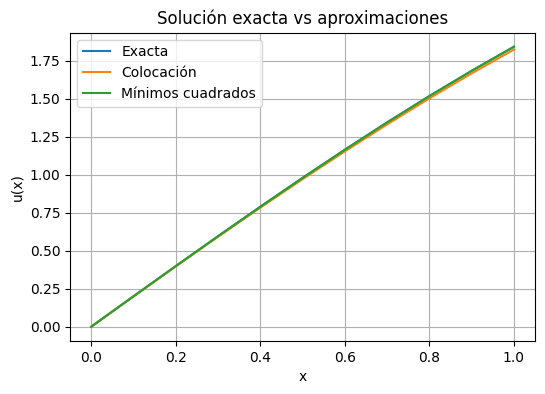

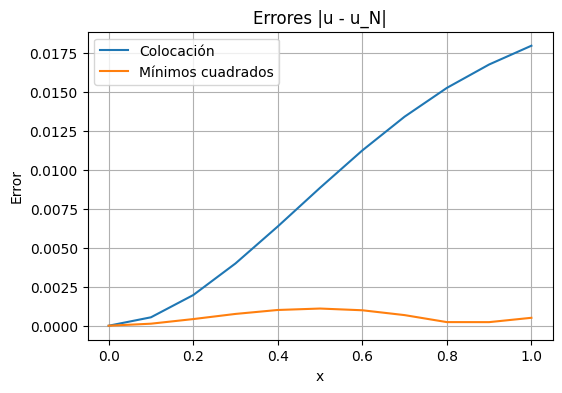


Aproximación por colocación:
u_col(x) = x*(-2*x**2 - x + 34)/17
Coeficientes: a2 = -1/17 , a3 = -2/17

Aproximación por mínimos cuadrados:
u_LS(x) = x*(-24759*x**2 - 2670*x + 347156)/173578
Coeficientes: a2 = -1335/86789 , a3 = -24759/173578


In [6]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ============================
# 1. Definiciones básicas
# ============================
x = sp.symbols('x')

u_exact = x + sp.sin(x)          # solución exacta
a2, a3 = sp.symbols('a2 a3')
uN = 2*x + a2*x**2 + a3*x**3     # aproximación cúbica con CI

R = sp.diff(uN, x, 2) + uN - x   # residuo

# ============================
# 2. Colocación (Ej. 5.1)
# ============================
eq1 = R.subs(x, sp.Rational(1, 2))
eq2 = R.subs(x, 1)

sol_col = sp.solve([eq1, eq2], [a2, a3])
a2_col, a3_col = sol_col[a2], sol_col[a3]
u_col = sp.simplify(uN.subs(sol_col))

# ============================
# 3. Mínimos cuadrados (Ej. 5.8)
# ============================
J = sp.integrate(R**2, (x, 0, 1))     # funcional
eqLS1 = sp.diff(J, a2)
eqLS2 = sp.diff(J, a3)

sol_ls = sp.solve([eqLS1, eqLS2], [a2, a3])
a2_ls, a3_ls = sol_ls[a2], sol_ls[a3]
u_ls = sp.simplify(uN.subs(sol_ls))

# ============================
# 4. Errores simbólicos
# ============================
E_col = sp.simplify(u_exact - u_col)
E_ls  = sp.simplify(u_exact - u_ls)

f_exact   = sp.lambdify(x, u_exact, 'numpy')
f_col     = sp.lambdify(x, u_col,   'numpy')
f_ls      = sp.lambdify(x, u_ls,    'numpy')
f_err_col = sp.lambdify(x, E_col,   'numpy')
f_err_ls  = sp.lambdify(x, E_ls,    'numpy')

# ============================
# 5. Tabla comparativa
# ============================
xs = np.linspace(0, 1, 11)

tabla = pd.DataFrame({
    "x": xs,
        "u_exact": f_exact(xs),
            "u_coloc": f_col(xs),
                "u_LS":    f_ls(xs),
                    "Error_coloc": np.abs(f_err_col(xs)),
                        "Error_LS":    np.abs(f_err_ls(xs)),
                        })

print("TABLA COMPARATIVA:\n")
print(tabla.to_string(index=False))

# ============================
# 6. Gráficas
# ============================
plt.figure(figsize=(6,4))
plt.plot(xs, f_exact(xs))
plt.plot(xs, f_col(xs))
plt.plot(xs, f_ls(xs))
plt.xlabel("x"); plt.ylabel("u(x)")
plt.title("Solución exacta vs aproximaciones")
plt.legend(["Exacta", "Colocación", "Mínimos cuadrados"])
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(xs, np.abs(f_err_col(xs)))
plt.plot(xs, np.abs(f_err_ls(xs)))
plt.xlabel("x"); plt.ylabel("Error")
plt.title("Errores |u - u_N|")
plt.legend(["Colocación", "Mínimos cuadrados"])
plt.grid(True)
plt.show()

# ============================
# 7. Resultados finales
# ============================
print("\nAproximación por colocación:")
print("u_col(x) =", u_col)
print("Coeficientes: a2 =", a2_col, ", a3 =", a3_col)

print("\nAproximación por mínimos cuadrados:")
print("u_LS(x) =", u_ls)
print("Coeficientes: a2 =", a2_ls, ", a3 =", a3_ls)